# The primary objective of this project is to develop a robust fraud detection system that effectively predicts fraudulent activities while minimizing the occurrence of false positives. The aim is to strike a balance between fraud detection accuracy and ensuring a seamless customer experience.

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
pd.set_option("display.max.columns", None)
import seaborn as sns
import numpy as np
import datetime
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV , RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LassoCV
from sklearn.metrics import roc_auc_score, roc_curve

/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_excel('/Users/haitonghuang/Downloads/UCLA & ID.me.xlsx')
df

Y        S1        S2  V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  \
0      0 -0.306302  0.416396   1   0   5   0   0   0   1   1   0    0   28   
1      0 -0.305808  0.416396   1   0   1   0   0   0   0   0   0    0    1   
2      0 -0.305815 -0.451262   1   0   6   0   0   0   0   0   2    0    6   
3      0 -0.303949  0.416396   1   0   1   0   0   0   0   0   0    0    2   
4      0 -0.306135  0.416396   1   1   2   0   0   0   0   0   0    0    3   
...   ..       ...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   
39995  1  0.397275  0.416396   1   1   1   0   0   0   0   0   0    1    1   
39996  0 -0.305159  0.349653   1   0   1   0   0   0   0   0   0    0    1   
39997  0 -0.300191 -2.720520   1   0   1   0   0   0   0   0   0    0    2   
39998  0 -0.302411  0.416396   1   0   1   0   0   0   1   0   0    0    1   
39999  0 -0.304373  0.416396   1   0   1   0   0   0   0   0   0    0    1   

       F1  F2  F3  F4  F5  F6  F7  F8  F9  F10  F11  VV1  VV2  VV3  VV4  VV5  \
0       1   0   0   0   0   0   0   0   0    0    1    0    0    0    0    0   
1       1   0   0   0   0   0   0   0   0    0    0    0    0    0    1    0   
2       0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
3       1   0   0   1   0   0   0   0   0    0    0    0    0    0    0    0   
4       1   0   1   0   0   0   0   0   0    0    0    0    0    0    0    0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
39995   0   0   0   0   0   0   0   0   0    0    0    0    0    0    1    0   
39996   1   0   0   0   0   0   0   0   0    0    0    0    0    0    0    1   
39997   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0   
39998   1   0   0   1   0   0   0   0   0    0    0    0    0    0    0    0   
39999   0   0   0   0   0   0   0   0   0    0    0    0    0    0    1    0   

       VV6  VV7  VV8  VV9  VV10  VV11  T1  T2  T3  T4  T5  T6  T7  T8  T9  
0        0    0    0    0     0     0   0   0   0   0   0   0   0   0   0  
1        0    0    0    0     0     0   0   0   0   0   0   0   0   0   0  
2        0    0    0    0     0     0   0   0   0   0   0   0   0   0   0  
3        0    0    0    0     0     0   0   0   0   0   0   0   1   0   0  
4        0    0    0    0     0     0   0   0   0   0   0   0   0   0   0  
...    ...  ...  ...  ...   ...   ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  
39995    0    0    0    0     0     0   0   0   0   0   0   0   0   0   0  
39996    0    0    0    0     0     0   0   0   0   0   0   0   0   0   0  
39997    0    0    0    0     0     0   0   0   0   0   0   1   0   0   0  
39998    0    0    0    0     0     0   0   0   0   0   0   0   0   0   0  
39999    0    0    0    0     0     0   0   0   0   0   0   0   0   0   0  

[40000 rows x 45 columns]

In [3]:
df.shape

(40000, 45)

In [4]:
df.dtypes

Y         int64
S1      float64
S2      float64
V1        int64
V2        int64
V3        int64
V4        int64
V5        int64
V6        int64
V7        int64
V8        int64
V9        int64
V10       int64
V11       int64
F1        int64
F2        int64
F3        int64
F4        int64
F5        int64
F6        int64
F7        int64
F8        int64
F9        int64
F10       int64
F11       int64
VV1       int64
VV2       int64
VV3       int64
VV4       int64
VV5       int64
VV6       int64
VV7       int64
VV8       int64
VV9       int64
VV10      int64
VV11      int64
T1        int64
T2        int64
T3        int64
T4        int64
T5        int64
T6        int64
T7        int64
T8        int64
T9        int64
dtype: object

In [5]:
df.isnull().sum()

Y       0
S1      0
S2      0
V1      0
V2      0
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
V10     0
V11     0
F1      0
F2      0
F3      0
F4      0
F5      0
F6      0
F7      0
F8      0
F9      0
F10     0
F11     0
VV1     0
VV2     0
VV3     0
VV4     0
VV5     0
VV6     0
VV7     0
VV8     0
VV9     0
VV10    0
VV11    0
T1      0
T2      0
T3      0
T4      0
T5      0
T6      0
T7      0
T8      0
T9      0
dtype: int64

In [6]:
# Dropping User IDs
df = df.drop(['S1','S2'], axis = 1)
df

Y  V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  F1  F2  F3  F4  F5  \
0      0   1   0   5   0   0   0   1   1   0    0   28   1   0   0   0   0   
1      0   1   0   1   0   0   0   0   0   0    0    1   1   0   0   0   0   
2      0   1   0   6   0   0   0   0   0   2    0    6   0   0   0   0   0   
3      0   1   0   1   0   0   0   0   0   0    0    2   1   0   0   1   0   
4      0   1   1   2   0   0   0   0   0   0    0    3   1   0   1   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ..  ..  ..  ..  ..   
39995  1   1   1   1   0   0   0   0   0   0    1    1   0   0   0   0   0   
39996  0   1   0   1   0   0   0   0   0   0    0    1   1   0   0   0   0   
39997  0   1   0   1   0   0   0   0   0   0    0    2   0   0   0   0   0   
39998  0   1   0   1   0   0   0   1   0   0    0    1   1   0   0   1   0   
39999  0   1   0   1   0   0   0   0   0   0    0    1   0   0   0   0   0   

       F6  F7  F8  F9  F10  F11  VV1  VV2  VV3  VV4  VV5  VV6  VV7  VV8  VV9  \
0       0   0   0   0    0    1    0    0    0    0    0    0    0    0    0   
1       0   0   0   0    0    0    0    0    0    1    0    0    0    0    0   
2       0   0   0   0    0    0    0    0    0    0    0    0    0    0    0   
3       0   0   0   0    0    0    0    0    0    0    0    0    0    0    0   
4       0   0   0   0    0    0    0    0    0    0    0    0    0    0    0   
...    ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
39995   0   0   0   0    0    0    0    0    0    1    0    0    0    0    0   
39996   0   0   0   0    0    0    0    0    0    0    1    0    0    0    0   
39997   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0   
39998   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0   
39999   0   0   0   0    0    0    0    0    0    1    0    0    0    0    0   

       VV10  VV11  T1  T2  T3  T4  T5  T6  T7  T8  T9  
0         0     0   0   0   0   0   0   0   0   0   0  
1         0     0   0   0   0   0   0   0   0   0   0  
2         0     0   0   0   0   0   0   0   0   0   0  
3         0     0   0   0   0   0   0   0   1   0   0  
4         0     0   0   0   0   0   0   0   0   0   0  
...     ...   ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  
39995     0     0   0   0   0   0   0   0   0   0   0  
39996     0     0   0   0   0   0   0   0   0   0   0  
39997     0     0   0   0   0   0   0   1   0   0   0  
39998     0     0   0   0   0   0   0   0   0   0   0  
39999     0     0   0   0   0   0   0   0   0   0   0  

[40000 rows x 43 columns]

In [7]:
# V1,V2,V3,V4,V5,V6,V7,V9,V10,V11 are not binary variables
df.describe()

Y            V1            V2            V3            V4  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.100000      0.994125      0.565625      1.834175      0.140200   
std        0.300004      0.134503      0.547815      1.487526      0.886179   
min        0.000000      0.000000      0.000000      1.000000      0.000000   
25%        0.000000      1.000000      0.000000      1.000000      0.000000   
50%        0.000000      1.000000      1.000000      1.000000      0.000000   
75%        0.000000      1.000000      1.000000      2.000000      0.000000   
max        1.000000      4.000000      4.000000     46.000000     68.000000   

                 V5            V6            V7            V8            V9  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.103550      2.330850     66.241925      0.056700      0.157425   
std        0.453743     15.714596   1589.513809      0.231271      0.471909   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      1.000000      0.000000      0.000000   
max       21.000000    383.000000  72479.000000      1.000000     13.000000   

                V10           V11            F1            F2            F3  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.308825      2.719400      0.289475      0.018575      0.103275   
std        1.437603      4.133581      0.453524      0.135020      0.304322   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      0.000000      0.000000      0.000000   
50%        0.000000      2.000000      0.000000      0.000000      0.000000   
75%        0.000000      3.000000      1.000000      0.000000      0.000000   
max       66.000000    166.000000      1.000000      1.000000      1.000000   

                 F4            F5           F6           F7            F8  \
count  40000.000000  40000.000000  40000.00000  40000.00000  40000.000000   
mean       0.045650      0.009450      0.08565      0.01265      0.037125   
std        0.208727      0.096752      0.27985      0.11176      0.189070   
min        0.000000      0.000000      0.00000      0.00000      0.000000   
25%        0.000000      0.000000      0.00000      0.00000      0.000000   
50%        0.000000      0.000000      0.00000      0.00000      0.000000   
75%        0.000000      0.000000      0.00000      0.00000      0.000000   
max        1.000000      1.000000      1.00000      1.00000      1.000000   

                 F9           F10          F11           VV1           VV2  \
count  40000.000000  40000.000000  40000.00000  40000.000000  40000.000000   
mean       0.103875      0.016075      0.00980      0.009500      0.014400   
std        0.305102      0.125766      0.09851      0.097005      0.119134   
min        0.000000      0.000000      0.00000      0.000000      0.000000   
25%        0.000000      0.000000      0.00000      0.000000      0.000000   
50%        0.000000      0.000000      0.00000      0.000000      0.000000   
75%        0.000000      0.000000      0.00000      0.000000      0.000000   
max        1.000000      1.000000      1.00000      1.000000      1.000000   

                VV3           VV4           VV5           VV6           VV7  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.021475      0.027275      0.041425      0.002675      0.033025   
std        0.144963      0.162886      0.199274      0.051652      0.178704   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        

In [8]:
# T1,T8,T9 only contains 0s

df.corr()

Y        V1        V2        V3        V4        V5        V6  \
Y     1.000000  0.057311  0.087090  0.173966  0.294357  0.382894  0.423251   
V1    0.057311  1.000000  0.167249  0.018247  0.010476  0.017342  0.023322   
V2    0.087090  0.167249  1.000000  0.111147  0.009886  0.021140  0.065164   
V3    0.173966  0.018247  0.111147  1.000000  0.030496  0.038887  0.133644   
V4    0.294357  0.010476  0.009886  0.030496  1.000000  0.854497  0.257103   
V5    0.382894  0.017342  0.021140  0.038887  0.854497  1.000000  0.305901   
V6    0.423251  0.023322  0.065164  0.133644  0.257103  0.305901  1.000000   
V7    0.027508 -0.002619 -0.001417  0.053297  0.329446  0.178250  0.206231   
V8    0.531201  0.050091  0.061994  0.057926  0.176028  0.238993  0.193201   
V9    0.495035  0.088621 -0.030825  0.098766  0.163992  0.216228  0.191728   
V10   0.543892  0.059162  0.072025  0.361604  0.100438  0.145636  0.276680   
V11   0.151190  0.022936  0.114088  0.561472  0.018684  0.024183  0.100409   
F1    0.082705  0.016405  0.067987  0.039211  0.014284  0.023568  0.036019   
F2    0.007838  0.007386  0.018502  0.020440 -0.004423 -0.002015  0.007496   
F3    0.099101  0.036812  0.063945  0.037335  0.021306  0.029554  0.036831   
F4   -0.038568  0.002429  0.018840  0.022449 -0.010814 -0.008469 -0.016495   
F5    0.053574  0.004266  0.034053  0.035034  0.008749  0.016434  0.016672   
F6   -0.050206 -0.004565 -0.009268 -0.006599 -0.010719 -0.016492 -0.023419   
F7    0.065170  0.054839  0.048918  0.005851  0.018190  0.026427  0.026415   
F8   -0.016969  0.009560 -0.002885  0.009178 -0.006446 -0.005762 -0.008754   
F9    0.033186  0.009998  0.032283  0.015314  0.005221  0.002844  0.015061   
F10   0.048172  0.001149  0.022608  0.022134  0.006472  0.014202  0.019446   
F11   0.013366  0.006232  0.028387  0.001536 -0.001706 -0.000331  0.008177   
VV1   0.119411  0.004278  0.024023  0.045049  0.035982  0.049786  0.042859   
VV2   0.140879  0.020882  0.028041  0.035341  0.043393  0.062601  0.060980   
VV3   0.082263  0.006471  0.021133  0.022544  0.025021  0.036508  0.030946   
VV4  -0.003632  0.000467  0.033034 -0.007644 -0.009865 -0.012845 -0.003789   
VV5   0.098818  0.021206  0.039565  0.022078  0.021758  0.031913  0.043660   
VV6   0.065019  0.023854  0.067572  0.009027  0.040417  0.043651  0.018345   
VV7   0.053115  0.021594  0.037236  0.025774  0.006914  0.017948  0.026396   
VV8   0.048469  0.020231  0.037693  0.027224  0.006917  0.008424  0.026389   
VV9   0.011388  0.040743  0.051804  0.030749 -0.000098  0.001439  0.000410   
VV10  0.112071  0.007373  0.053886  0.062471  0.020823  0.030064  0.054032   
VV11  0.024352 -0.005593  0.016722  0.003668  0.022459  0.017899  0.002038   
T1         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
T2   -0.002357  0.000309  0.012061 -0.001589 -0.001119 -0.001614 -0.001049   
T3    0.006912  0.041572  0.030127  0.023098 -0.002394 -0.002825 -0.002774   
T4   -0.001667  0.000218  0.013092  0.000557 -0.000791 -0.001141 -0.000742   
T5    0.008662  0.011490  0.037453  0.007754 -0.002741 -0.003953 -0.001559   
T6    0.055105  0.013127  0.063340  0.031999  0.017755  0.029303  0.024412   
T7    0.027670 -0.008313 -0.008052  0.000278  0.002870  0.005789  0.006257   
T8         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
T9         NaN       NaN       NaN       NaN       NaN       NaN       NaN   

            V7        V8        V9       V10       V11        F1        F2  \
Y     0.027508  0.531201  0.495035  0.543892  0.151190  0.082705  0.007838   
V1   -0.002619  0.050091  0.088621  0.059162  0.022936  0.016405  0.007386   
V2   -0.001417  0.061994 -0.030825  0.072025  0.114088  0.067987  0.018502   
V3    0.053297  0.057926  0.098766  0.361604  0.561472  0.039211  0.020440   
V4    0.329446  0.176028  0.163992  0.100438  0.018684  0.014284 -0.004423   
V5    0.178250  0.238993  0.216228  0.145636  0.024183  0.023568 -0.002015   
V6    0.206231  0.193201  0.191728

In [9]:
df = df.drop(['T1','T8','T9'],axis =1 )

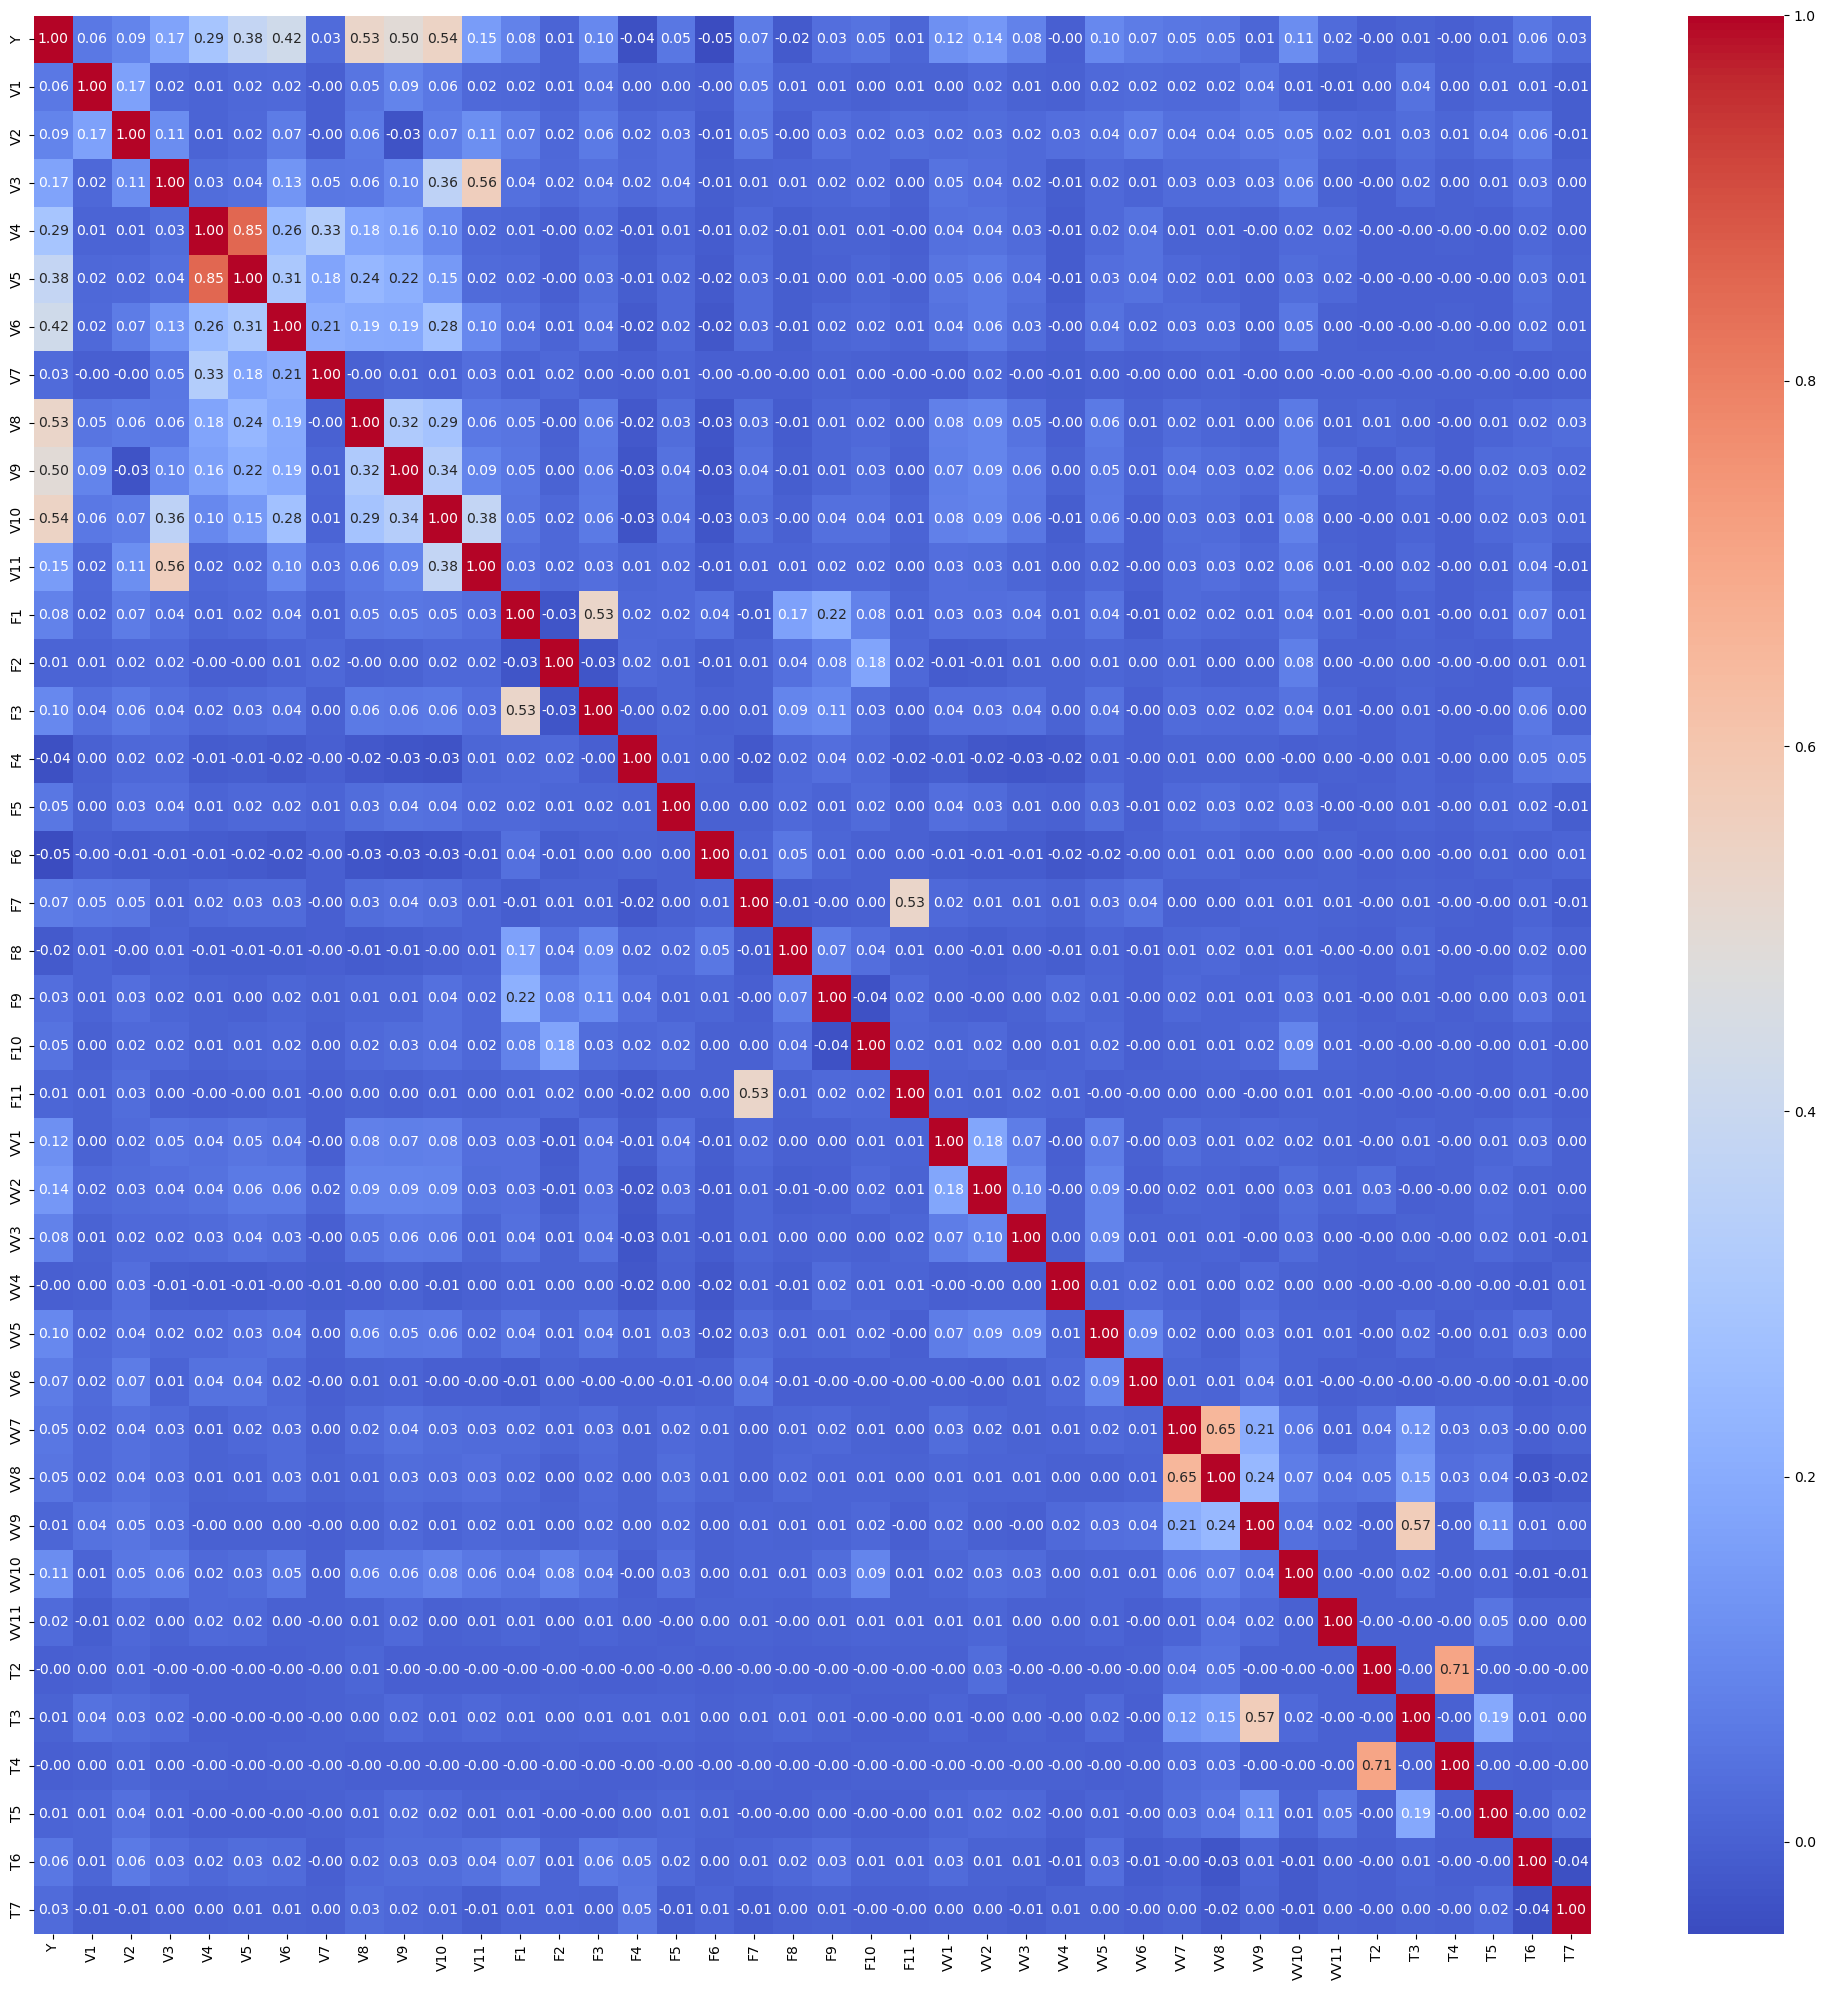

In [10]:
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')

fig.tight_layout()
plt.show()

In [11]:
sns.pairplot(df, hue ='Y')
plt.show()

In [12]:
df['V1'].value_counts()

1    39330
0      461
2      194
3       13
4        2
Name: V1, dtype: int64

In [ ]:
df['V2'].value_counts()

1    20625
0    18403
2      920
3       48
4        4
Name: V2, dtype: int64

In [ ]:
df['V3'].value_counts()

1     22346
2     10171
3      4053
4      1691
5       786
6       365
7       200
8       126
9        76
10       47
11       32
12       30
13       14
16       12
15       11
14       10
19        5
21        4
17        4
18        3
29        3
22        2
23        2
25        2
20        2
26        1
46        1
43        1
Name: V3, dtype: int64

In [ ]:
df['V4'].value_counts()

0     36901
1      2130
2       499
3       196
4        97
5        69
7        26
6        25
8        20
9         9
11        7
10        4
14        3
12        3
36        1
20        1
35        1
44        1
50        1
29        1
68        1
13        1
47        1
34        1
15        1
Name: V4, dtype: int64

In [32]:
sc = StandardScaler()

scaled = pd.DataFrame(sc.fit_transform(df[['V1','V2','V3','V4','V5','V6','V7','V9','V10','V11']]),columns = sc.get_feature_names_out(['V1','V2','V3','V4','V5','V6','V7','V9','V10','V11']))

In [33]:
df = df.drop(['V1','V2','V3','V4','V5','V6','V7','V9','V10','V11'], axis =1)


In [34]:
df = pd.concat([df,scaled], axis =1)

In [35]:
Y = df['Y']

X = df.drop('Y',axis =1 )

In [36]:
nfolds  = 10
lassocv = LassoCV(cv = nfolds, max_iter = 10000)
lassocv.fit(X,Y)

LassoCV(cv=10, max_iter=10000)

In [37]:
def plot_lassoCV(lasso,nfolds):
     #1se rule 
    mean = np.mean(lasso.mse_path_, axis=1)
    std_error = np.std(lasso.mse_path_, axis=1)/np.sqrt(nfolds)
    mean_min  = mean[lasso.alphas_==lasso.alpha_]
    std_min   = std_error[lasso.alphas_==lasso.alpha_]
    alpha_1se = np.max(lasso.alphas_[mean <= mean_min + std_min])

    # Plot    
    plt.semilogx(lasso.alphas_, np.mean(lasso.mse_path_, axis=1))

    plt.semilogx(lasso.alphas_, mean + std_error, "b--")
    plt.semilogx(lasso.alphas_, mean - std_error, "b--")
    plt.fill_between(lasso.alphas_, mean + std_error, mean - std_error, alpha=0.2)
    plt.axvline(lasso.alpha_, linestyle="--", color="black", label="$\lambda_{min}$")
    plt.axvline(alpha_1se, linestyle="--", color="red", label="$\lambda_{1se}$")
    plt.legend()
    plt.xlabel("$\log(\lambda)$")
    plt.ylabel("Mean Squared Error")
    plt.show() 
    
def get_coef(lasso,scale,coeffnames):
    # getting the coefficients and picking those that are not zero
    coefficients = np.append(lasso.intercept_, lasso.coef_/scale) 
    coeffnames = coeffnames[coefficients != 0]
    coeffvalues = coefficients[coefficients != 0]
    # return non-zero ones 
    return pd.DataFrame([coeffnames, coeffvalues]).T

In [38]:
coeffnames = list(X.columns)
coeffnames.insert(0,'Intercept')
coeffnames = np.array(coeffnames)
coef = get_coef(lassocv,1,coeffnames)


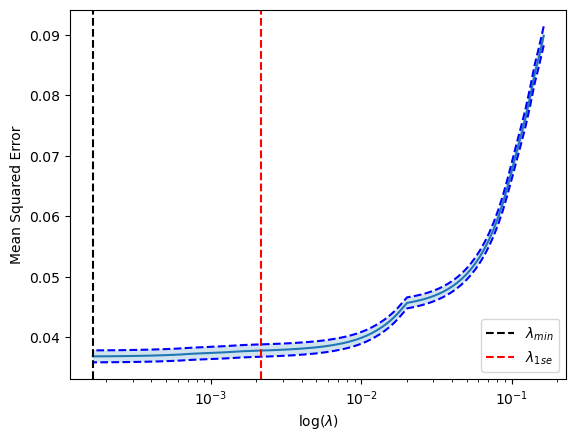

In [39]:
plot_lassoCV(lassocv,nfolds)

In [40]:
coefdf = coef.rename({0:'Features',1:'Coefficients'}, axis = 1).sort_values(by='Coefficients', ascending = False)
coefdf = coefdf[coefdf['Features'] != 'Intercept']
coefdf

Features Coefficients
1        V8     0.364672
15      VV6     0.216757
29      V10     0.092766
12      VV2     0.081981
11      VV1     0.074147
18     VV10     0.066947
28       V9     0.066197
26       V6     0.057256
7        F7     0.051056
25       V5     0.050529
14      VV5     0.032354
17      VV8     0.031978
13      VV3     0.026677
5        F5      0.02393
3        F3     0.022754
10      F10      0.01939
19       T6     0.018021
20       T7     0.017481
22       V2      0.00925
2        F1     0.007442
9        F9     0.004649
16      VV7     0.003532
23       V3      0.00064
24       V4    -0.002163
21       V1    -0.003304
30      V11    -0.010361
27       V7    -0.013131
4        F4    -0.015379
8        F8    -0.015529
6        F6    -0.019293

In [41]:
coefdf['Features']

1       V8
15     VV6
29     V10
12     VV2
11     VV1
18    VV10
28      V9
26      V6
7       F7
25      V5
14     VV5
17     VV8
13     VV3
5       F5
3       F3
10     F10
19      T6
20      T7
22      V2
2       F1
9       F9
16     VV7
23      V3
24      V4
21      V1
30     V11
27      V7
4       F4
8       F8
6       F6
Name: Features, dtype: object

In [42]:
X = df.loc[:,coefdf['Features']]
Y = df['Y']

In [43]:
x_train,x_test, y_train,y_test = train_test_split(X,Y,test_size = 0.3)

In [86]:
lg = LogisticRegression(class_weight = {0:0.25,1:0.75})
lg.fit(x_train,y_train)
lg_y_pred = lg.predict(x_test)

cv_scores_lg = cross_val_score(lg,x_train,y_train, cv=5)

print('Logistic Y predicted: ',lg_y_pred)
print(f'\nThe confusion matrix:\n{confusion_matrix(y_test,lg_y_pred)}')
print(f'\n{classification_report(y_test,lg_y_pred)}')
print(f'\nAccuracy of each cross validation: ',cv_scores_lg)
print(f'\nAverage 5-Fold CV Score: {np.mean(cv_scores_lg)}')
print(f'\nThe sd {cv_scores_lg.std()}')
print(f"\n{'-' *100 } \n")

cm = confusion_matrix(y_test, lg_y_pred)

# Print the confusion matrix
tn, fp, fn, tp = cm.ravel()

print(pd.DataFrame({'Actual Positive': [tp, fp], 'Actual Negative': [fn, tn]}, 
                   index=['Predicted Positive', 'Predicted Negative']))

# Calculate the false positive rate and false negative rate
fpr = fp / (tn + fp)
fnr = fn / (tp + fn)
print('False Positive Rate:', fpr)
print('False Negative Rate:', fnr)

print(f"\n{'-' *100 } \n")

lg_y_pred_prob = lg.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, lg_y_pred_prob)
print('AUC:', auc_score)

print(f"\n{'-' *100 } \n")

Logistic Y predicted:  [0 0 0 ... 0 0 0]

The confusion matrix:
[[10715    95]
 [  147  1043]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10810
           1       0.92      0.88      0.90      1190

    accuracy                           0.98     12000
   macro avg       0.95      0.93      0.94     12000
weighted avg       0.98      0.98      0.98     12000


Accuracy of each cross validation:  [0.97785714 0.97982143 0.98303571 0.98392857 0.98035714]

Average 5-Fold CV Score: 0.9810000000000001

The sd 0.0022090952991702722

---------------------------------------------------------------------------------------------------- 

                    Actual Positive  Actual Negative
Predicted Positive             1043              147
Predicted Negative               95            10715
False Positive Rate: 0.008788159111933395
False Negative Rate: 0.12352941176470589

-------------------------------------------------------------

In [ ]:
xgbc = XGBClassifier(learning_rate = 0.1, scale_pos_weight = 6, max_depth = 7,
                     use_label_encoder=False
                    )

xgbc.fit(x_train, y_train)

xgbc_y_pred = xgbc.predict(x_test)

xgbc_acc = accuracy_score(y_test, xgbc_y_pred)

cv_scores_xbgc = cross_val_score(xgbc,x_train,y_train, cv=5)

print('\nXGB Y accuracy: ',xgbc_acc)
print('XGB Y predicted: ',xgbc_y_pred)
print(f'\nThe confusion matrix:\n{confusion_matrix(y_test,xgbc_y_pred)}')
print(f'\n{classification_report(y_test,xgbc_y_pred)}')
print(f'\nAccuracy of each cross validation: ',cv_scores_xbgc)
print(f'\nAverage 5-Fold CV Score: {np.mean(cv_scores_xbgc)}')
print(f'\nThe sd {cv_scores_xbgc.std()}')

print(f"\n{'-' *100 } \n")

cm = confusion_matrix(y_test, xgbc_y_pred)

# Print the confusion matrix
tn, fp, fn, tp = cm.ravel()

print(pd.DataFrame({'Actual Positive': [tp, fn], 'Actual Negative': [fp, tn]}, 
                   index=['Predicted Positive', 'Predicted Negative']))

# Calculate the false positive rate and false negative rate
fpr = fp / (tn + fp)
fnr = fn / (tp + fn)
print('False Positive Rate:', fpr)
print('False Negative Rate:', fnr)

print(f"\n{'-' *100 } \n")

xgbc_y_pred_prob = xgbc.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, xgbc_y_pred_prob)
print('AUC:', auc_score)

print(f"\n{'-' *100 } \n")

[19:39:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:39:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:39:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:39:33] WARNING: /Users/runner/miniforge3/cond

In [80]:
rf1 = RandomForestClassifier(class_weight = {0:0.3,1:0.7} ,n_estimators = 1000)

rf1.fit(x_train,y_train)


y_predrf1 = rf1.predict(x_test)

cv_scoresrf = cross_val_score(rf1,x_train,y_train, cv=5)

rf1_acc = accuracy_score(y_test, y_predrf1)

print('\nrandom forest Y accuracy: ',rf1_acc)
print('random forest Y predicted: ',y_predrf1)
print(f'\nThe confusion matrix: \n{confusion_matrix(y_test,y_predrf1)}')
print(f'\n{classification_report(y_test, y_predrf1)}')
print(f'\nAccuracy of each cross validation: ',cv_scoresrf)
print(f'\nAverage 5-Fold CV Score RandomForestClassifier: {np.mean(cv_scoresrf):.5f}')
print(f'\nThe sd {cv_scoresrf.std()}')
print(f"\n{'-' *100 } \n")

print("Feature Importances\n")

importances = pd.Series(data=rf1.feature_importances_,
                        index= x_train.columns)

print(importances.sort_values(ascending = False))

print(f"\n{'-' *100 } \n")

cmrf = confusion_matrix(y_test, y_predrf1)

# Print the confusion matrix
tn, fp, fn, tp = cmrf.ravel()

print(pd.DataFrame({'Actual Positive': [tp, fn], 'Actual Negative': [fp, tn]}, 
                   index=['Predicted Positive', 'Predicted Negative']))

# Calculate the false positive rate and false negative rate
fpr = fp / (tn + fp)
fnr = fn / (tp + fn)
print('False Positive Rate:', fpr)
print('False Negative Rate:', fnr)

print(f"\n{'-' *100 } \n")


y_predrf_prob = rf1.predict_proba(x_test)[:, 1]



auc_score = roc_auc_score(y_test, y_predrf_prob)
print('AUC:', auc_score)

print(f"\n{'-' *100 } \n")



random forest Y accuracy:  0.9884166666666667
random forest Y predicted:  [0 0 0 ... 0 0 0]

The confusion matrix: 
[[10763    47]
 [   92  1098]]

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10810
           1       0.96      0.92      0.94      1190

    accuracy                           0.99     12000
   macro avg       0.98      0.96      0.97     12000
weighted avg       0.99      0.99      0.99     12000


Accuracy of each cross validation:  [0.98803571 0.9875     0.98803571 0.98892857 0.98821429]

Average 5-Fold CV Score RandomForestClassifier: 0.98814

The sd 0.0004601463830973008

---------------------------------------------------------------------------------------------------- 

Feature Importances

V6      0.350871
V10     0.185775
V7      0.169721
V9      0.076625
V8      0.063784
V5      0.032610
V4      0.030900
V11     0.023077
V3      0.014559
V2      0.007816
F1      0.004512
T6      0.004026
F3      0.0036

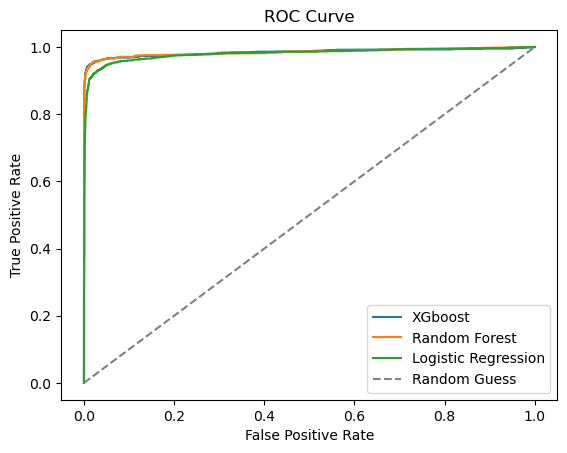

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, xgbc_y_pred_prob)

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_predrf_prob)

fpr3, tpr3, thresholds3 = roc_curve(y_test, lg_y_pred_prob)

plt.plot(fpr, tpr, label='XGboost')
plt.plot(fpr2, tpr2, label='Random Forest')
plt.plot(fpr3, tpr3, label='Logistic Regression')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [78]:
# Random Forest with built in balanced class weights perform slightly worse.

rf2 = RandomForestClassifier(class_weight = 'balanced' ,n_estimators = 1000)

rf2.fit(x_train,y_train)

y_predrf2 = rf2.predict(x_test)

cv_scoresrf2 = cross_val_score(rf2,x_train,y_train, cv=5)

rf2_acc = accuracy_score(y_test, y_predrf2)

print('\nrandom forest Y accuracy: ',rf2_acc)
print('random forest Y predicted: ',y_predrf2)
print(f'\nThe confusion matrix: \n{confusion_matrix(y_test,y_predrf2)}')
print(f'\n{classification_report(y_test, y_predrf2)}')
print(f'\nAccuracy of each cross validation: ',cv_scoresrf2)
print(f'\nAverage 5-Fold CV Score RandomForestClassifier: {np.mean(cv_scoresrf2):.5f}')
print(f'\nThe sd {cv_scoresrf2.std()}')

print(f"{'-' * 80}")

cmrf2 = confusion_matrix(y_test, y_predrf2)

# Print the confusion matrix
tn, fp, fn, tp = cmrf2.ravel()

print(pd.DataFrame({'Actual Positive': [tp, fn], 'Actual Negative': [fp, tn]}, 
                   index=['Predicted Positive', 'Predicted Negative']))

# Calculate the false positive rate and false negative rate
fpr = fp / (tn + fp)
fnr = fn / (tp + fn)
print('False Positive Rate:', fpr)
print('False Negative Rate:', fnr)

print(f"\n{'-' *100 } \n")


y_predrf2_prob = rf2.predict_proba(x_test)[:, 1]


auc_score = roc_auc_score(y_test, y_predrf2_prob)
print('AUC:', auc_score)

print(f"\n{'-' *100 } \n")


random forest Y accuracy:  0.98775
random forest Y predicted:  [0 0 0 ... 0 0 0]

The confusion matrix: 
[[10756    54]
 [   93  1097]]

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10810
           1       0.95      0.92      0.94      1190

    accuracy                           0.99     12000
   macro avg       0.97      0.96      0.97     12000
weighted avg       0.99      0.99      0.99     12000


Accuracy of each cross validation:  [0.98660714 0.98625    0.98732143 0.98928571 0.98803571]

Average 5-Fold CV Score RandomForestClassifier: 0.98750

The sd 0.0010832679205788022
--------------------------------------------------------------------------------
                    Actual Positive  Actual Negative
Predicted Positive             1097               54
Predicted Negative               93            10756
False Positive Rate: 0.004995374653098982
False Negative Rate: 0.07815126050420168

------------------------------